# 7.4.2 Long Short-Term Memory (LSTM)

## Explanation of Long Short-Term Memory (LSTM) networks
Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) designed to handle the vanishing gradient problem, making them more effective for learning long-term dependencies. LSTMs achieve this by introducing special units called memory cells, which can maintain their state over time. These cells use three gates to regulate the flow of information: 
1. The input gate, which controls how much of the new information to add to the cell state.
2. The forget gate, which decides how much of the existing information to discard.
3. The output gate, which determines the final output based on the cell state.

## Benefits and use cases of LSTMs
LSTMs are particularly effective in tasks involving sequential data where long-term dependencies are crucial. Some common applications include:
- **Natural Language Processing (NLP)**: Language modeling, machine translation, text generation.
- **Time Series Analysis**: Forecasting future values in financial markets, weather prediction.
- **Speech Recognition**: Converting speech into text while considering context.
- **Anomaly Detection**: Identifying unusual patterns in sequential data.

## Methods for implementing LSTMs
Implementing LSTMs involves similar steps to basic RNNs, with the primary difference being the use of LSTM layers instead of simple recurrent layers. The steps include:
1. Preparing the sequential data.
2. Defining the LSTM model architecture.
3. Compiling the model with an appropriate loss function and optimizer.
4. Training the model on the training data.
5. Evaluating the model on test data.


___
___
### Readings:
- [Introduction to Long Short-Term Memory (LSTM)](https://medium.com/analytics-vidhya/introduction-to-long-short-term-memory-lstm-a8052cd0d4cd)
- [Long Short-Term Memory (LSTM): Concept](https://medium.com/@kangeugine/long-short-term-memory-lstm-concept-cb3283934359)
- [LSTM- Long Short-Term Memory](https://medium.com/analytics-vidhya/lstm-long-short-term-memory-5ac02af47606)
- [Long Short-Term Memory (LSTM)](https://d2l.ai/chapter_recurrent-modern/lstm.html#)
- [Long Short Term Memories (LSTMs)](https://srdas.github.io/DLBook/RNNs.html#LSTMs)
- [The Recurrent Neural Network](https://com-cog-book.github.io/com-cog-book/features/recurrent-net.html)
___
___

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load and preprocess the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Cut texts after this number of words
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), "train sequences")
print(len(X_test), "test sequences")

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
 

25000 train sequences
25000 test sequences
X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model_lstm = Sequential([
    tf.keras.layers.Input(shape=(maxlen,)),
    tf.keras.layers.Embedding(max_features, 128),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [3]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {lstm_accuracy * 100:.2f}%')

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 168ms/step - accuracy: 0.6881 - loss: 0.5740 - val_accuracy: 0.7812 - val_loss: 0.4888
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 169ms/step - accuracy: 0.8247 - loss: 0.3991 - val_accuracy: 0.7868 - val_loss: 0.4704
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8366 - loss: 0.3755 - val_accuracy: 0.8350 - val_loss: 0.4018
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8754 - loss: 0.3075 - val_accuracy: 0.7928 - val_loss: 0.4675
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 169ms/step - accuracy: 0.8891 - loss: 0.2764 - val_accuracy: 0.8330 - val_loss: 0.4109
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8315 - loss: 0.4147
LSTM Test Accuracy: 83.39%


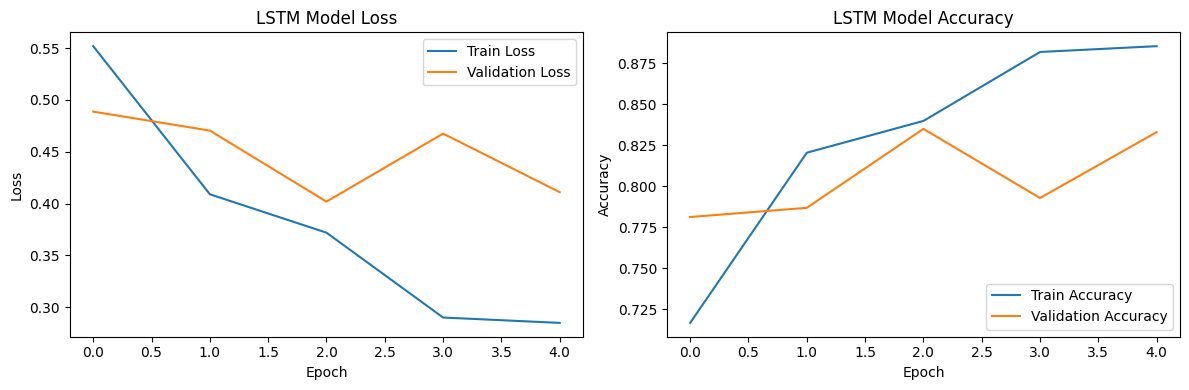

In [4]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step


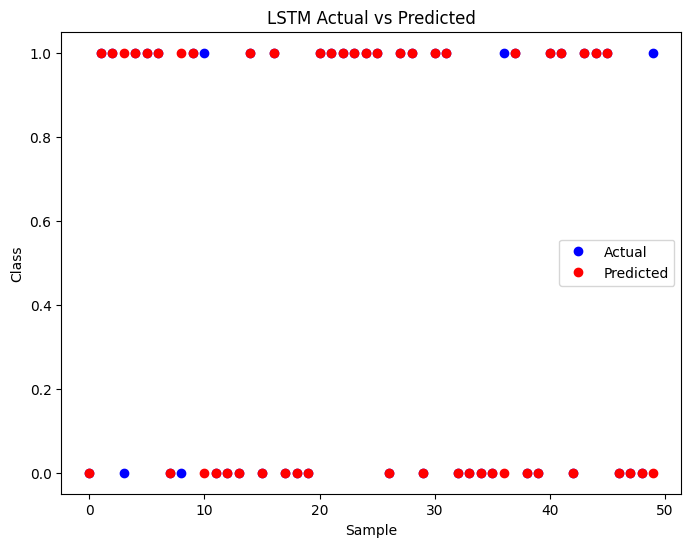

In [5]:
# Make predictions
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_classes = (y_pred_lstm > 0.5).astype("int32")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test[:50], 'bo', label='Actual')
plt.plot(y_pred_lstm_classes[:50], 'ro', label='Predicted')
plt.title('LSTM Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.legend()
plt.show()

## Conclusion

In this section, we explored the architecture and implementation of Long Short-Term Memory (LSTM) networks. We applied LSTMs to the IMDB dataset for sentiment analysis, demonstrating the process of defining, training, and evaluating an LSTM model using TensorFlow and Keras. The model's performance was visualized, showing both the training history and a comparison of actual vs. predicted labels. LSTMs are powerful for handling sequential data with long-term dependencies, making them a valuable tool for various applications in natural language processing, time series analysis, and beyond.
